In [7]:
import operator
import pandas as pd
from calendar import monthrange
%pylab inline

import statsmodels.api as sm

Populating the interactive namespace from numpy and matplotlib



In [8]:
df = pd.read_csv("./monthly-milk-production.csv", sep=';')
df.head(5)

,month,milk
0,01.01.1962,589
1,01.02.1962,561
2,01.03.1962,640
3,01.04.1962,656
4,01.05.1962,727


In [9]:
monthrange(*[2001, 2])[1]

28

In [10]:
df["daily"] = df.apply(
    lambda row: row["milk"]/monthrange(
        *map(
            int,
            operator.itemgetter(2,1)(
                row['month'].split(".")
            )
        )
    )[1], 
    axis=1
)

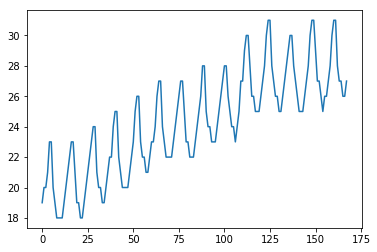

In [11]:
df.daily.plot()

In [13]:
print "p-value", sm.tsa.adfuller(df.daily)[1]

 p-value 0.668537107473825


In [16]:
df["diff1"] = df.daily - df.daily.shift(1)
print "p-value",sm.tsa.adfuller(df.diff1[1:])[1]

p-value 0.020005349420570546


In [17]:
df["diff12"] = df.daily - df.daily.shift(12)
print "p-value",sm.tsa.adfuller(df.diff12[12:])[1]

p-value 0.19420165222112867


In [18]:
df["diff12_1"] = df["diff12"] - df.diff12.shift(1)
print "p-value",sm.tsa.adfuller(df.diff12_1[13:])[1]

p-value 5.909253101910137e-06


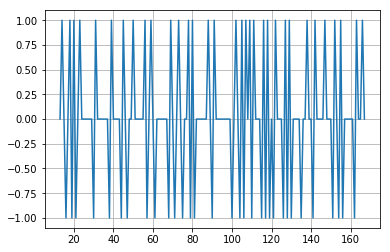

In [19]:
df.diff12_1.plot(grid=True)

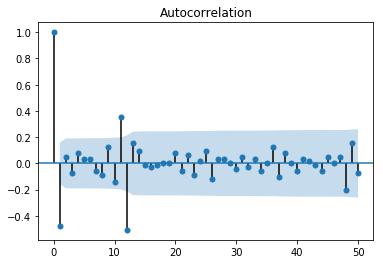

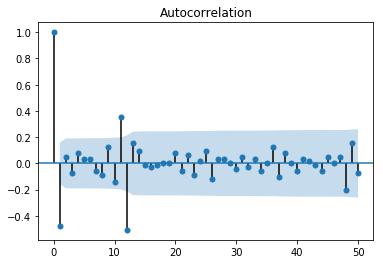

In [123]:
_ = sm.graphics.tsa.plot_acf(df.diff12_1[13:].values.squeeze(), lags=50)

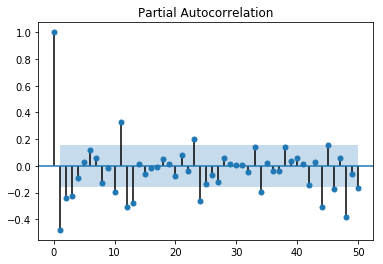

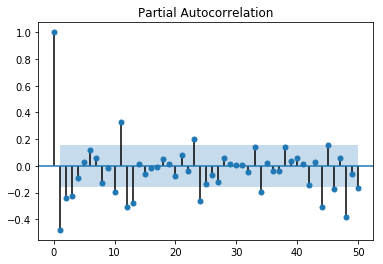

In [124]:
_ = sm.graphics.tsa.plot_pacf(df.diff12_1[13:].values.squeeze(), lags=50)